In [8]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Let's get the versions numbers we want to create comparison plots of. These should have already had all of the plots generated using the productionFeedback module.

In [9]:
versionNumbers = ["v9_05_00","v9_08_00"]
versionPaths = ["./images/"+x+"/" for x in versionNumbers]
print(versionNumbers)

['v9_05_00', 'v9_08_00']


Lets first look at the farlineHistograms canvas

In [10]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_farlineHistograms.root")
    f.ls()
    c = f.Get("c")
#    c.Draw()
    prims = list(c.GetListOfPrimitives())
    for x in prims:
        #print(list(x.GetListOfPrimitives())[1])
        h = list(x.GetListOfPrimitives())[1].Clone()
        h.SetDirectory(0)
        histVec.append(h)
        print(h)
    
    f.Close()
print(histVec)

./images/v9_05_00/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffebc299a0>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7bc89e0>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffebb9d270>
<ROOT.TH1D object ("farlineCTag") at 0x7fffebc29d90>
./images/v9_08_00/
<ROOT.TH1D object ("allCaloEnergies") at 0x7fffebd10490>
<ROOT.TH1D object ("allCaloWiggle") at 0x7fffebd110e0>
<ROOT.TH1D object ("allCaloTimes") at 0x7fffebbcfa20>
<ROOT.TH1D object ("farlineCTag") at 0x7fffebbcfe80>
[<ROOT.TH1D object ("allCaloEnergies") at 0x7fffebc299a0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffe7bc89e0>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffebb9d270>, <ROOT.TH1D object ("farlineCTag") at 0x7fffebc29d90>, <ROOT.TH1D object ("allCaloEnergies") at 0x7fffebd10490>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffebd110e0>, <ROOT.TH1D object ("allCaloTimes") at 0x7fffebbcfa20>, <ROOT.TH1D object ("farlineCTag") at 0x7fffebbcfe80>]
TFile**		./images/v9_05_00/v9_05_00_farlineHistograms.root	
 TFile*		./images

v9_05_00
v9_08_00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cNew


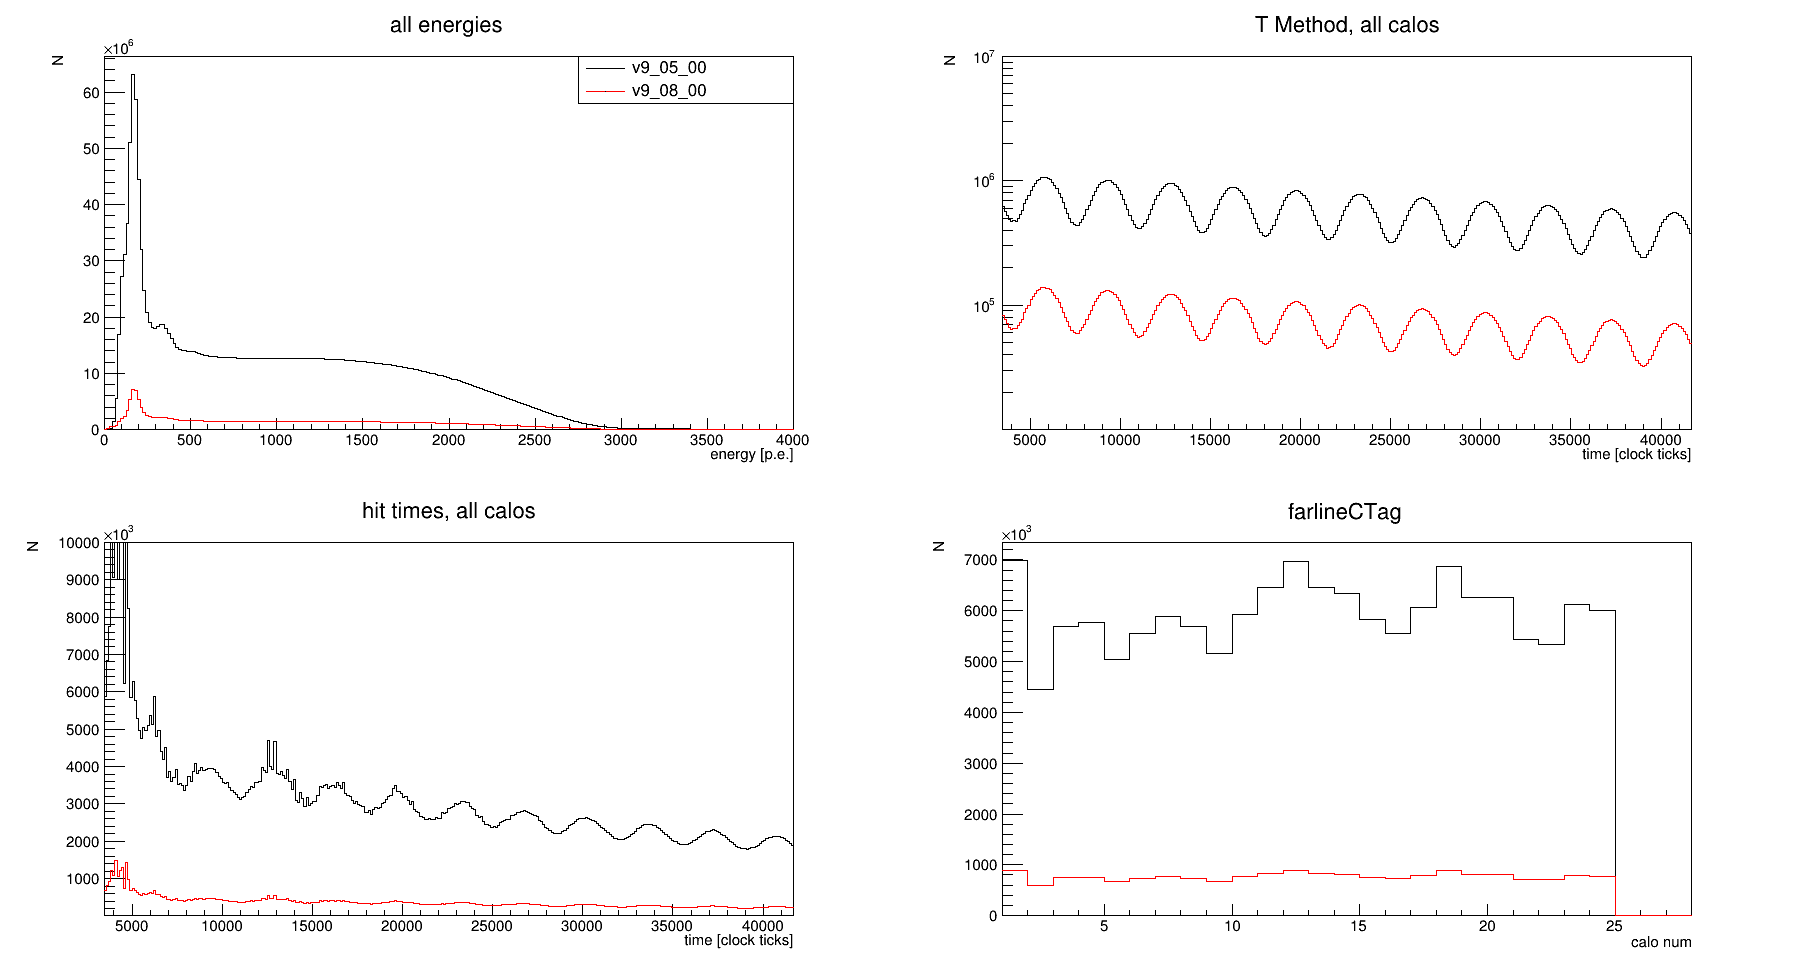

In [17]:
n = len(versionPaths)
c = r.TCanvas("cNew","cNew",1800,1000)
c.Divide(2,2)

c.cd(1)
leg = r.TLegend(0.65,0.8,0.9,0.9)
for version in range(n):
    histVec[version*4+0].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+0].Draw()
    else:
        histVec[version*4+0].Draw("SAME")
    leg.AddEntry(histVec[version*4+0],versionNumbers[version],"pl")
    print(versionNumbers[version])
leg.Draw()

c.cd(2)
r.gPad.SetLogy()
for version in range(n):
    histVec[version*4+1].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+1].Draw()
        histVec[version*4+1].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+1].Draw("SAME")

c.cd(3)
for version in range(n):
    histVec[version*4+2].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+2].Draw()
        histVec[version*4+2].GetYaxis().SetRangeUser(10000,10000000)
    else:
        histVec[version*4+2].Draw("SAME")

c.cd(4)
for version in range(n):
    histVec[version*4+3].SetLineColor(version+1)
    if(version<0.9):
        histVec[version*4+3].Draw()
    else:
        histVec[version*4+3].Draw("SAME")
    
    
c.Draw()

Now let's compare the 5 parameter fits for all of the calos

./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffeb82d390>]
[<ROOT.TFrame object ("TFrame") at 0x7fffeba0ecd0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffebae8240>, <ROOT.TPaveText object ("title") at 0x7fffe755f5b0>, <ROOT.TPad object ("upper_pad") at 0x7fffe755f960>, <ROOT.TPad object ("lower_pad") at 0x7fffe755d600>, <ROOT.TPad object ("top_pad") at 0x7fffe7469390>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffe7467b30>]
./images/v9_08_00/
[<ROOT.TKey object ("c1") at 0x7fffeba4e030>]
[<ROOT.TFrame object ("TFrame") at 0x7fffeb840310>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffeba3d2d0>, <ROOT.TPaveText object ("title") at 0x7fffeba3d790>, <ROOT.TPad object ("upper_pad") at 0x7fffebae4670>, <ROOT.TPad object ("lower_pad") at 0x7fffebae4ff0>, <ROOT.TPad object ("top_pad") at 0x7fffeb82db70>, <ROOT.TRatioPlot object ("TRatioPlot") at 0x7fffeb82e5a0>]
[<ROOT.TH1D object ("allCaloWiggle") at 0x7fffeba512d0>, <ROOT.TH1D object ("allCaloWiggle") at 0x7fffebae36b0>]
TFile**		

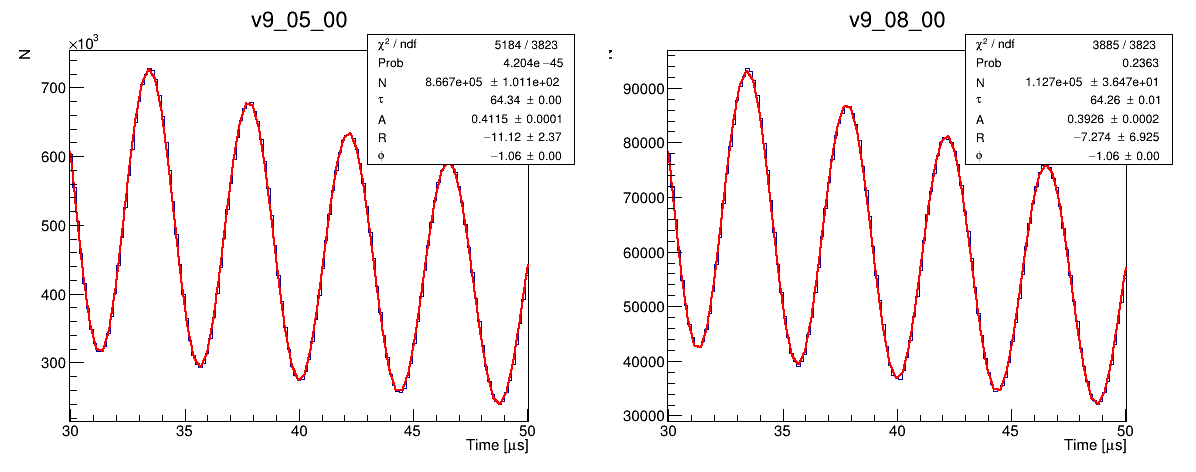

In [5]:
c4 = r.TCanvas("c4","c4",1200,500)
c4.Divide(int(len(versionPaths)),1)

histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_TmethodWiggleFitAllCalos.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    pad = prims[1].Clone()
    pad.SetDirectory(0)
    histVec.append(pad)
    
print(histVec)
    
for i in range(len(versionNumbers)):
    histVec[i].SetTitle(versionNumbers[i])
    c4.cd(i+1)
    histVec[i].Draw()
    
    
c4.Draw()

And the residuals

./images/v9_05_00/
[<ROOT.TKey object ("c1") at 0x7fffebba3e50>]
[<ROOT.TFrame object ("TFrame") at 0x7fffeba7d270>, <ROOT.TH1D object ("out_MAG P") at 0x7fffeba62b70>, <ROOT.TPaveText object ("title") at 0x7fffeba7ea20>]
./images/v9_08_00/
[<ROOT.TKey object ("c1") at 0x7fffeb667be0>]
[<ROOT.TFrame object ("TFrame") at 0x7fffeba3bcb0>, <ROOT.TH1D object ("out_MAG P") at 0x7fffebbd88f0>, <ROOT.TPaveText object ("title") at 0x7fffebbd8ce0>]
[<ROOT.TH1D object ("out_MAG P") at 0x7fffeba63030>, <ROOT.TH1D object ("out_MAG P") at 0x7fffeba4d490>]
TFile**		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1
TFile**		./images/v9_08_00/v9_08_00_5ParamResiduals.root	
 TFile*		./images/v9_08_00/v9_08_00_5ParamResiduals.root	
  KEY: TCanvas	c1;1	c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::SaveAs>: ROOT file hi.root has been created


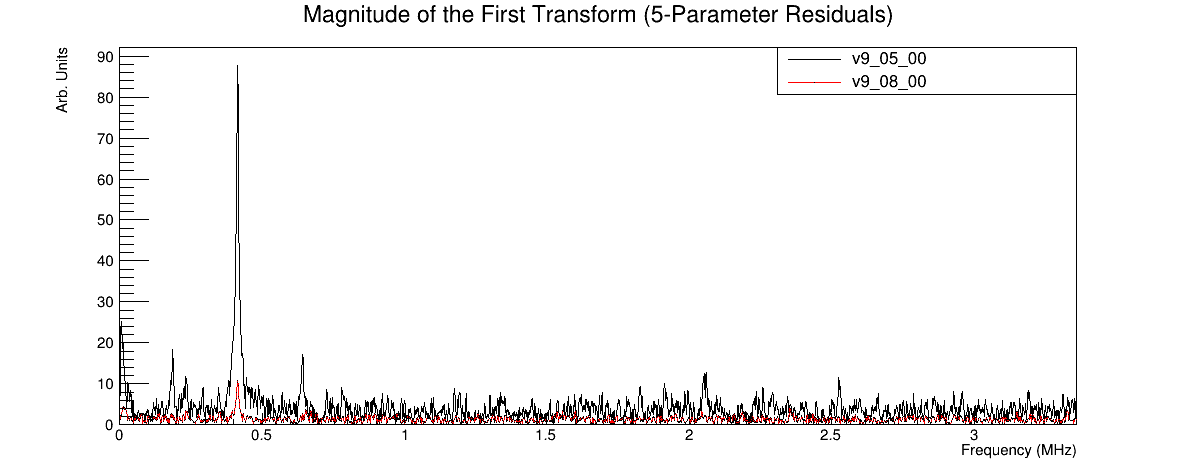

In [6]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_5ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
#c4.SetLogy()
c4.Draw()
c4.Print("hi.root")

And now let's do the same for the 13-parameter fits

./images/v9_05_00/
[<ROOT.TKey object ("c1_n6") at 0x7ffff8cfda50>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff8ca7f30>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff8f153c0>, <ROOT.TPaveText object ("title") at 0x7ffff8b5a110>]
./images/v9_07_00/
[<ROOT.TKey object ("c1_n58") at 0x7ffff802d2d0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff8b69650>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff8c0a050>, <ROOT.TPaveText object ("title") at 0x7ffff8cfda50>]
[<ROOT.TH1D object ("out_MAG P") at 0x7ffff8a993e0>, <ROOT.TH1D object ("out_MAG P") at 0x7ffff8e11560>]
TFile**		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
 TFile*		./images/v9_05_00/v9_05_00_13ParamResiduals.root	
  KEY: TCanvas	c1_n6;1	c1_n6
TFile**		./images/v9_07_00/v9_07_00_13ParamResiduals.root	
 TFile*		./images/v9_07_00/v9_07_00_13ParamResiduals.root	
  KEY: TCanvas	c1_n58;1	c1_n58


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


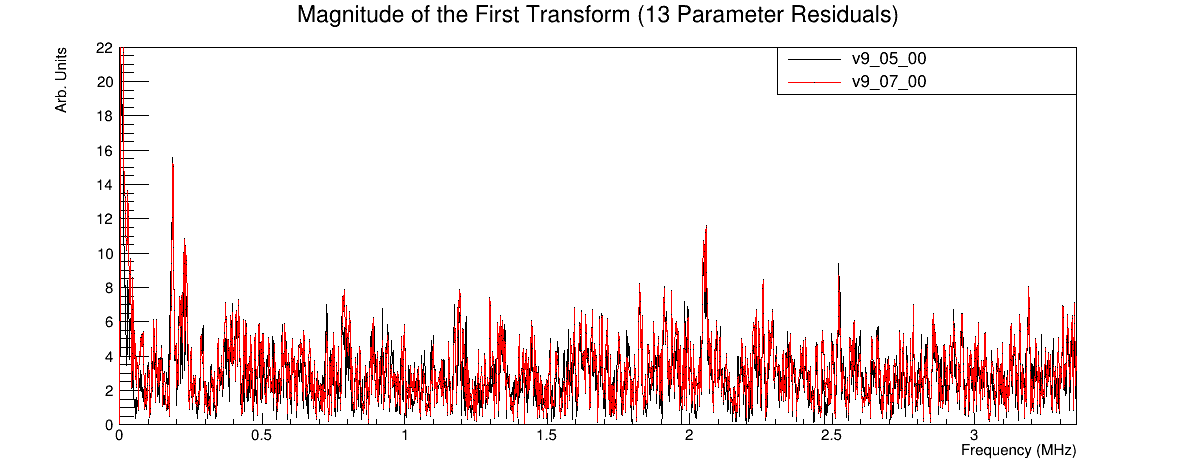

In [22]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_13ParamResiduals.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    hist = prims[1].Clone()
    hist.SetDirectory(0)
    histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",1200,500)
leg = r.TLegend(0.65,0.8,0.9,0.9)
print(histVec)
for i, hist in enumerate(histVec):
    
    hist.SetLineColor(i+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    leg.AddEntry(hist,versionNumbers[i],"pl")

leg.Draw()
c4.Draw()

./images/v9_05_00/
[<ROOT.TKey object ("c3") at 0x7ffff8d50ee0>]
[<ROOT.TFrame object ("TFrame") at 0x7ffff8d3b520>, <ROOT.TH1D object ("hi") at 0x7ffff8a993e0>, <ROOT.TH1D object ("hi") at 0x7ffff8be8350>, <ROOT.TH1D object ("hi") at 0x7ffff8be87b0>, <ROOT.TH1D object ("hi") at 0x7ffff8f14b20>, <ROOT.TH1D object ("hi") at 0x7ffff8f14f80>, <ROOT.TH1D object ("hi") at 0x7ffff8deaa90>, <ROOT.TH1D object ("hi") at 0x7ffff8deaef0>, <ROOT.TH1D object ("hi") at 0x7ffff8cfe9c0>, <ROOT.TH1D object ("hi") at 0x7ffff8cfee20>, <ROOT.TH1D object ("hi") at 0x7ffff8de9c60>, <ROOT.TH1D object ("hi") at 0x7ffff8dea0c0>, <ROOT.TH1D object ("hi") at 0x7ffff8f15910>, <ROOT.TH1D object ("hi") at 0x7ffff8f15d70>, <ROOT.TH1D object ("hi") at 0x7ffff8f161d0>, <ROOT.TH1D object ("hi") at 0x7ffff8f16630>, <ROOT.TH1D object ("hi") at 0x7ffff8d46b50>, <ROOT.TH1D object ("hi") at 0x7ffff8d46fb0>, <ROOT.TH1D object ("hi") at 0x7ffff8d47410>, <ROOT.TH1D object ("hi") at 0x7ffff8d47870>, <ROOT.TH1D object ("hi") at 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


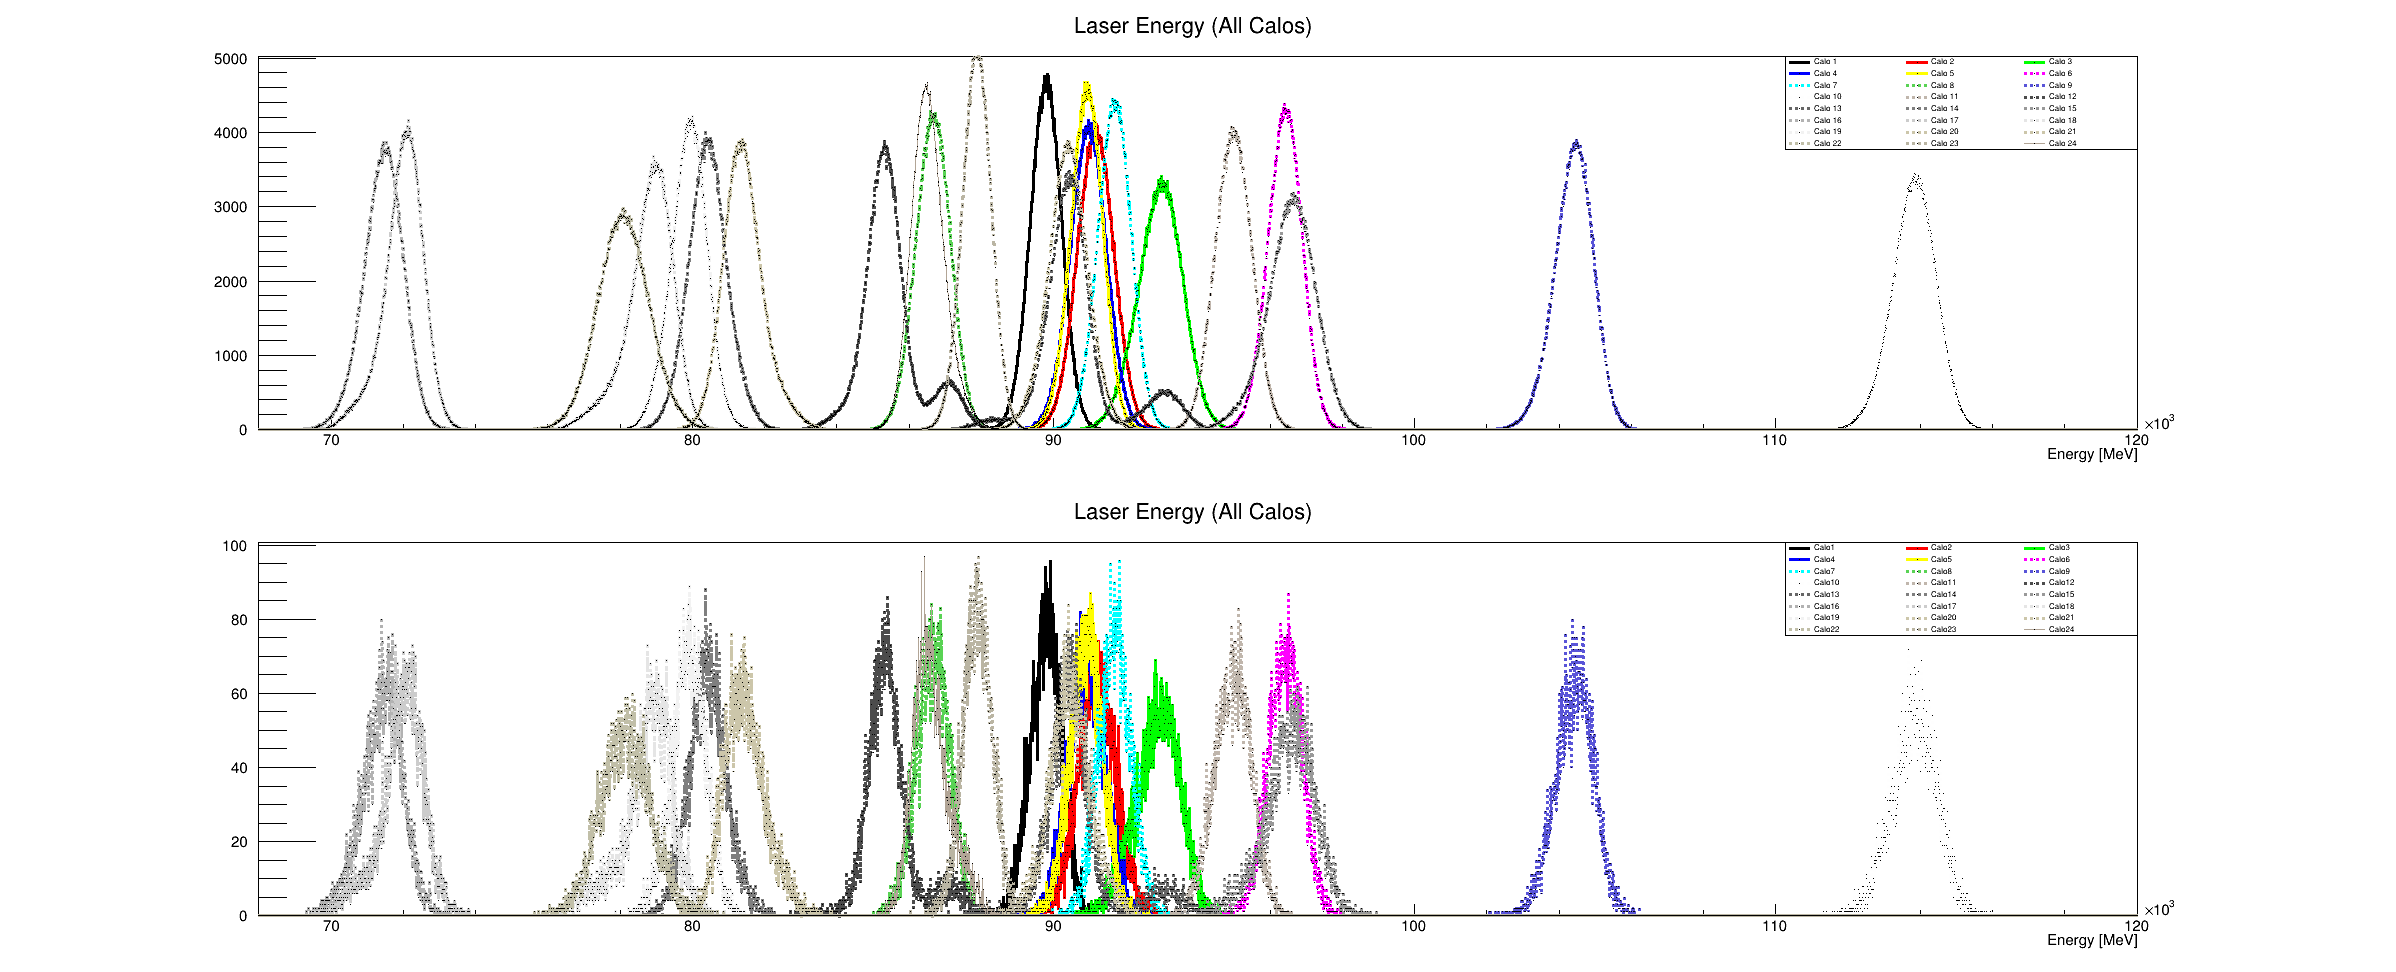

In [23]:
histVec = []
for i, versionPath in enumerate(versionPaths):
    print(versionPath)
    f = r.TFile(versionPath+versionNumbers[i]+"_laserEnergyPulse_allcalo.root")
    f.ls()
    keys = list(f.GetListOfKeys())
    print(keys)
    c = f.Get(keys[0].GetName())
    c.cd(0)
    prims = list(c.GetListOfPrimitives())
    print(prims)
    
    for x in prims:
        if(str(type(x)) == "<class 'ROOT.TH1D'>"):
            hist = x.Clone()
            hist.SetDirectory(0)
            histVec.append(hist)
   

c4 = r.TCanvas("c4","c4",2400,1000)
c4.Divide(1,2)
c4.cd(0)
leg = r.TLegend(0.75,0.7,0.9,0.9)
leg.SetNColumns(3)
c4.cd(2)
leg2 = r.TLegend(0.75,0.7,0.9,0.9)
leg2.SetNColumns(3)

print(histVec)
for i, hist in enumerate(histVec):
    
    if i < 24:
        c4.cd(1)
        hist.SetLineColor(i+1)
    else:
        c4.cd(2)
        hist.SetLineColor((i-24)+1)
    
    if i < 0.5:
        hist.Draw("HIST P0 L")
    else:
        hist.Draw("HIST P0 L SAME")
    if i < 24:
        leg.AddEntry(hist,"Calo "+str(i+1),"pl")
    else:
        leg2.AddEntry(hist,"Calo"+str(i-24+1),"pl")

c4.cd(1)     
leg.Draw()
c4.cd(2)
leg2.Draw()
c4.Draw()